In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [3]:
population_model = "PBH-bpower-2nd"
cosmology_model = 'flatLCDM'
outdir = f'./results/H0_GWTC-3_{population_model}_{cosmology_model}_final2/'
injections.update_cut(snr_cut=9, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict['ms'] = Uniform(5.0, 50.0, name='$m_*$')
prior_dict['α1'] = Uniform(0, 3.0, name='$\\alpha_1$')
prior_dict['α2'] = Uniform(1.0, 10.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict

{'ms': Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

23:36 bilby INFO    : Running for label 'dynesty', output will be saved to './results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2/'
23:36 bilby INFO    : Search parameters:
23:36 bilby INFO    :   ms = Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
23:36 bilby INFO    :   α1 = Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
23:36 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
23:36 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
23:36 bilby INFO    :   H0 = 67.4
23:36 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


23:39 bilby INFO    : Single likelihood evaluation took 1.685e+00 s


0it [00:00, ?it/s]

23:39 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f0d90087a90>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
23:39 bilby INFO    : Checkpoint every check_point_delta_t = 60s
23:39 bilby INFO    : Using dynesty version 1.0.1
23:39 bilby INFO    : Using the bilby-implemented rwalk sampl

537it [26:44,  6.47it/s, bound:0 nc:  5 ncall:1.5e+03 eff:35.9% logz=-2078.97+/-0.17 dlogz:312.067>0.1]     

00:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


782it [27:47,  3.53it/s, bound:0 nc:  6 ncall:2.5e+03 eff:31.5% logz=-1938.05+/-0.15 dlogz:173.599>0.1]

00:07 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


967it [28:53,  1.64it/s, bound:0 nc: 11 ncall:3.5e+03 eff:27.6% logz=-1889.75+/-0.15 dlogz:124.818>0.1]

00:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1088it [29:57,  1.35it/s, bound:0 nc: 22 ncall:4.5e+03 eff:24.1% logz=-1869.67+/-0.15 dlogz:104.563>0.1]

00:09 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1192it [31:04,  1.56it/s, bound:0 nc: 27 ncall:5.5e+03 eff:21.6% logz=-1855.73+/-0.15 dlogz:90.248>0.1] 

00:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1274it [32:05,  1.52it/s, bound:0 nc: 46 ncall:6.5e+03 eff:19.5% logz=-1845.36+/-0.15 dlogz:80.802>0.1]

00:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1349it [33:07,  1.68it/s, bound:0 nc: 13 ncall:7.5e+03 eff:17.9% logz=-1838.12+/-0.15 dlogz:73.441>0.1]

00:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1404it [34:12,  1.80s/it, bound:0 nc: 64 ncall:8.6e+03 eff:16.3% logz=-1833.62+/-0.15 dlogz:68.796>0.1]

00:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1464it [35:14,  1.08s/it, bound:0 nc:  8 ncall:9.6e+03 eff:15.3% logz=-1827.96+/-0.15 dlogz:63.035>0.1]

00:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1511it [36:17,  1.35it/s, bound:0 nc:  9 ncall:1.1e+04 eff:14.2% logz=-1824.70+/-0.15 dlogz:59.641>0.1]

00:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1557it [37:20,  1.18s/it, bound:0 nc: 20 ncall:1.2e+04 eff:13.4% logz=-1821.87+/-0.15 dlogz:56.714>0.1]

00:16 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1599it [38:24,  1.32s/it, bound:0 nc: 22 ncall:1.3e+04 eff:12.7% logz=-1818.98+/-0.15 dlogz:53.757>0.1]

00:17 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1632it [39:27,  2.42s/it, bound:0 nc:143 ncall:1.4e+04 eff:11.9% logz=-1816.82+/-0.15 dlogz:51.512>0.1]

00:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1679it [40:31,  1.00it/s, bound:0 nc: 19 ncall:1.5e+04 eff:11.4% logz=-1814.28+/-0.15 dlogz:48.868>0.1]

00:19 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1709it [41:38,  3.38s/it, bound:0 nc:125 ncall:1.6e+04 eff:10.9% logz=-1812.94+/-0.15 dlogz:47.465>0.1]

00:20 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1749it [42:46,  1.68s/it, bound:0 nc:102 ncall:1.7e+04 eff:10.4% logz=-1811.27+/-0.15 dlogz:45.722>0.1]

00:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1775it [44:40, 15.62s/it, bound:1 nc: 56 ncall:1.8e+04 eff:10.0% logz=-1810.16+/-0.15 dlogz:44.561>0.1]

00:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1833it [46:36,  2.45s/it, bound:6 nc: 34 ncall:1.9e+04 eff:9.4% logz=-1807.53+/-0.15 dlogz:41.803>0.1] 

00:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1859it [47:39,  2.70s/it, bound:9 nc: 44 ncall:2.0e+04 eff:9.2% logz=-1806.45+/-0.15 dlogz:40.677>0.1]

00:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1888it [48:42,  2.67s/it, bound:12 nc: 35 ncall:2.1e+04 eff:8.9% logz=-1805.10+/-0.15 dlogz:39.275>0.1]

00:27 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1966it [51:35,  2.42s/it, bound:20 nc: 29 ncall:2.4e+04 eff:8.2% logz=-1801.70+/-0.15 dlogz:35.706>0.1]

00:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1990it [52:36,  2.52s/it, bound:22 nc: 44 ncall:2.5e+04 eff:8.1% logz=-1800.76+/-0.15 dlogz:36.603>0.1]

00:31 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2017it [53:41,  2.59s/it, bound:25 nc: 38 ncall:2.6e+04 eff:7.9% logz=-1799.77+/-0.15 dlogz:35.542>0.1]

00:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2048it [54:44,  2.45s/it, bound:29 nc: 21 ncall:2.7e+04 eff:7.7% logz=-1798.70+/-0.15 dlogz:34.416>0.1]

00:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2079it [55:47,  2.39s/it, bound:32 nc: 33 ncall:2.8e+04 eff:7.5% logz=-1797.61+/-0.15 dlogz:33.268>0.1]

00:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2109it [56:48,  2.36s/it, bound:35 nc: 36 ncall:2.9e+04 eff:7.4% logz=-1796.44+/-0.16 dlogz:32.286>0.1]

00:36 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2137it [57:53,  2.53s/it, bound:38 nc: 29 ncall:3.0e+04 eff:7.2% logz=-1795.39+/-0.16 dlogz:31.178>0.1]

00:37 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2164it [58:58,  2.67s/it, bound:41 nc: 33 ncall:3.1e+04 eff:7.1% logz=-1794.54+/-0.16 dlogz:30.264>0.1]

00:38 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2194it [59:59,  2.51s/it, bound:44 nc: 28 ncall:3.2e+04 eff:6.9% logz=-1793.79+/-0.15 dlogz:29.447>0.1]

00:39 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2242it [1:02:01,  2.73s/it, bound:50 nc: 54 ncall:3.3e+04 eff:6.7% logz=-1792.56+/-0.16 dlogz:28.128>0.1]

00:41 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2325it [1:05:03,  2.43s/it, bound:58 nc: 38 ncall:3.6e+04 eff:6.4% logz=-1790.52+/-0.16 dlogz:25.922>0.1]

00:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2351it [1:06:11,  2.55s/it, bound:61 nc: 40 ncall:3.7e+04 eff:6.3% logz=-1789.80+/-0.16 dlogz:25.151>0.1]

00:45 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2380it [1:07:12,  2.39s/it, bound:65 nc: 63 ncall:3.8e+04 eff:6.2% logz=-1789.08+/-0.16 dlogz:24.371>0.1]

00:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2409it [1:08:19,  2.39s/it, bound:68 nc: 38 ncall:3.9e+04 eff:6.2% logz=-1788.36+/-0.16 dlogz:23.589>0.1]

00:47 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2440it [1:09:27,  2.36s/it, bound:71 nc: 40 ncall:4.0e+04 eff:6.1% logz=-1787.58+/-0.16 dlogz:22.751>0.1]

00:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2471it [1:10:36,  2.31s/it, bound:75 nc: 25 ncall:4.1e+04 eff:6.0% logz=-1786.79+/-0.16 dlogz:21.899>0.1]

00:49 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2501it [1:11:43,  2.63s/it, bound:78 nc: 38 ncall:4.2e+04 eff:5.9% logz=-1786.15+/-0.16 dlogz:21.195>0.1]

00:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2531it [1:12:52,  2.79s/it, bound:82 nc: 38 ncall:4.4e+04 eff:5.8% logz=-1785.64+/-0.16 dlogz:20.622>0.1]

00:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2561it [1:14:01,  2.81s/it, bound:85 nc: 38 ncall:4.5e+04 eff:5.7% logz=-1785.15+/-0.16 dlogz:20.073>0.1]

00:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2592it [1:15:10,  2.69s/it, bound:89 nc: 38 ncall:4.6e+04 eff:5.6% logz=-1784.67+/-0.16 dlogz:19.525>0.1]

00:54 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2621it [1:16:19,  2.69s/it, bound:92 nc: 68 ncall:4.7e+04 eff:5.6% logz=-1784.18+/-0.16 dlogz:19.247>0.1]

00:55 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2651it [1:17:26,  2.55s/it, bound:96 nc: 34 ncall:4.8e+04 eff:5.5% logz=-1783.71+/-0.16 dlogz:18.707>0.1]

00:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2680it [1:18:34,  2.53s/it, bound:99 nc: 40 ncall:4.9e+04 eff:5.4% logz=-1783.28+/-0.16 dlogz:18.226>0.1]

00:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2708it [1:19:42,  2.52s/it, bound:103 nc: 39 ncall:5.0e+04 eff:5.4% logz=-1782.86+/-0.16 dlogz:17.744>0.1]

00:58 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2737it [1:20:51,  2.83s/it, bound:107 nc: 29 ncall:5.2e+04 eff:5.3% logz=-1782.48+/-0.16 dlogz:17.306>0.1]

01:00 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2767it [1:22:00,  2.94s/it, bound:110 nc: 38 ncall:5.3e+04 eff:5.2% logz=-1782.10+/-0.16 dlogz:16.863>0.1]

01:01 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2809it [1:23:10,  2.12s/it, bound:116 nc: 32 ncall:5.4e+04 eff:5.2% logz=-1781.59+/-0.16 dlogz:16.275>0.1]

01:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2827it [1:24:18,  2.91s/it, bound:118 nc: 33 ncall:5.5e+04 eff:5.1% logz=-1781.38+/-0.16 dlogz:16.031>0.1]

01:03 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2857it [1:25:27,  2.75s/it, bound:121 nc: 36 ncall:5.6e+04 eff:5.1% logz=-1781.03+/-0.16 dlogz:15.621>0.1]

01:04 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2882it [1:26:36,  2.88s/it, bound:125 nc: 37 ncall:5.7e+04 eff:5.0% logz=-1780.75+/-0.16 dlogz:15.282>0.1]

01:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2906it [1:27:43,  2.90s/it, bound:128 nc: 38 ncall:5.9e+04 eff:5.0% logz=-1780.47+/-0.16 dlogz:14.963>0.1]

01:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2936it [1:28:49,  2.52s/it, bound:131 nc: 40 ncall:6.0e+04 eff:4.9% logz=-1780.15+/-0.16 dlogz:14.581>0.1]

01:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2964it [1:29:56,  2.46s/it, bound:135 nc: 40 ncall:6.1e+04 eff:4.9% logz=-1779.88+/-0.16 dlogz:14.247>0.1]

01:09 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2989it [1:31:03,  2.97s/it, bound:138 nc: 40 ncall:6.2e+04 eff:4.8% logz=-1779.63+/-0.16 dlogz:13.955>0.1]

01:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3013it [1:32:11,  3.36s/it, bound:141 nc: 40 ncall:6.3e+04 eff:4.8% logz=-1779.41+/-0.16 dlogz:13.681>0.1]

01:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3044it [1:33:21,  3.09s/it, bound:145 nc: 37 ncall:6.4e+04 eff:4.8% logz=-1779.13+/-0.16 dlogz:13.343>0.1]

01:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3073it [1:34:28,  3.00s/it, bound:148 nc: 74 ncall:6.5e+04 eff:4.7% logz=-1778.89+/-0.16 dlogz:13.707>0.1]

01:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3098it [1:35:36,  3.10s/it, bound:152 nc: 37 ncall:6.6e+04 eff:4.7% logz=-1778.67+/-0.16 dlogz:13.437>0.1]

01:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3124it [1:36:43,  3.10s/it, bound:155 nc: 63 ncall:6.7e+04 eff:4.6% logz=-1778.42+/-0.16 dlogz:13.141>0.1]

01:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3147it [1:37:48,  3.21s/it, bound:159 nc: 37 ncall:6.9e+04 eff:4.6% logz=-1778.21+/-0.16 dlogz:12.879>0.1]

01:17 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3171it [1:38:57,  3.19s/it, bound:162 nc:109 ncall:7.0e+04 eff:4.6% logz=-1778.00+/-0.16 dlogz:12.625>0.1]

01:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3199it [1:40:06,  2.93s/it, bound:166 nc: 40 ncall:7.1e+04 eff:4.5% logz=-1777.78+/-0.16 dlogz:12.342>0.1]

01:19 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3228it [1:41:16,  2.72s/it, bound:169 nc: 40 ncall:7.2e+04 eff:4.5% logz=-1777.56+/-0.16 dlogz:12.064>0.1]

01:20 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3259it [1:42:24,  2.44s/it, bound:173 nc: 39 ncall:7.3e+04 eff:4.5% logz=-1777.33+/-0.16 dlogz:11.773>0.1]

01:21 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3288it [1:43:34,  2.78s/it, bound:176 nc: 39 ncall:7.4e+04 eff:4.4% logz=-1777.13+/-0.16 dlogz:11.517>0.1]

01:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3315it [1:44:42,  2.97s/it, bound:180 nc: 40 ncall:7.5e+04 eff:4.4% logz=-1776.94+/-0.16 dlogz:11.273>0.1]

01:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3342it [1:45:48,  3.01s/it, bound:184 nc: 33 ncall:7.7e+04 eff:4.4% logz=-1776.74+/-0.16 dlogz:11.023>0.1]

01:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3369it [1:46:57,  2.96s/it, bound:187 nc: 39 ncall:7.8e+04 eff:4.3% logz=-1776.55+/-0.17 dlogz:10.776>0.1]

01:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3394it [1:48:05,  3.00s/it, bound:190 nc: 73 ncall:7.9e+04 eff:4.3% logz=-1776.38+/-0.17 dlogz:10.555>0.1]

01:27 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3420it [1:49:10,  2.86s/it, bound:193 nc: 36 ncall:8.0e+04 eff:4.3% logz=-1776.21+/-0.17 dlogz:10.335>0.1]

01:28 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3445it [1:50:16,  2.87s/it, bound:197 nc: 99 ncall:8.1e+04 eff:4.3% logz=-1776.06+/-0.17 dlogz:10.128>0.1]

01:29 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3465it [1:51:23,  3.18s/it, bound:200 nc:102 ncall:8.2e+04 eff:4.2% logz=-1775.93+/-0.17 dlogz:9.963>0.1] 

01:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3489it [1:52:30,  3.06s/it, bound:203 nc: 40 ncall:8.3e+04 eff:4.2% logz=-1775.78+/-0.17 dlogz:9.763>0.1]

01:31 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3517it [1:53:40,  2.83s/it, bound:206 nc: 93 ncall:8.4e+04 eff:4.2% logz=-1775.61+/-0.17 dlogz:9.538>0.1]

01:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3547it [1:54:47,  2.52s/it, bound:210 nc: 38 ncall:8.5e+04 eff:4.2% logz=-1775.43+/-0.17 dlogz:9.297>0.1]

01:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3567it [1:55:54,  3.23s/it, bound:214 nc: 40 ncall:8.6e+04 eff:4.1% logz=-1775.30+/-0.17 dlogz:9.130>0.1]

01:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3591it [1:57:05,  3.61s/it, bound:217 nc: 89 ncall:8.8e+04 eff:4.1% logz=-1775.15+/-0.17 dlogz:8.927>0.1]

01:36 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3618it [1:58:13,  3.39s/it, bound:221 nc: 64 ncall:8.9e+04 eff:4.1% logz=-1774.97+/-0.17 dlogz:8.696>0.1]

01:37 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3639it [1:59:22,  3.73s/it, bound:224 nc: 39 ncall:9.0e+04 eff:4.1% logz=-1774.83+/-0.17 dlogz:8.516>0.1]

01:38 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3661it [2:00:30,  3.66s/it, bound:228 nc: 35 ncall:9.1e+04 eff:4.0% logz=-1774.69+/-0.17 dlogz:8.331>0.1]

01:39 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3685it [2:01:38,  3.46s/it, bound:231 nc:110 ncall:9.2e+04 eff:4.0% logz=-1774.54+/-0.17 dlogz:8.133>0.1]

01:40 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3710it [2:02:46,  3.27s/it, bound:234 nc: 78 ncall:9.3e+04 eff:4.0% logz=-1774.38+/-0.17 dlogz:7.924>0.1]

01:42 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3741it [2:03:55,  2.76s/it, bound:238 nc: 35 ncall:9.4e+04 eff:4.0% logz=-1774.19+/-0.17 dlogz:7.666>0.1]

01:43 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3770it [2:05:04,  2.62s/it, bound:241 nc: 37 ncall:9.5e+04 eff:3.9% logz=-1774.02+/-0.17 dlogz:7.587>0.1]

01:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3799it [2:06:12,  2.53s/it, bound:245 nc: 36 ncall:9.7e+04 eff:3.9% logz=-1773.85+/-0.17 dlogz:7.367>0.1]

01:45 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3829it [2:07:22,  2.79s/it, bound:249 nc: 38 ncall:9.8e+04 eff:3.9% logz=-1773.69+/-0.17 dlogz:7.148>0.1]

01:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3859it [2:08:31,  2.86s/it, bound:252 nc: 39 ncall:9.9e+04 eff:3.9% logz=-1773.54+/-0.17 dlogz:6.938>0.1]

01:47 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3888it [2:09:40,  2.87s/it, bound:256 nc: 38 ncall:1.0e+05 eff:3.9% logz=-1773.40+/-0.17 dlogz:6.740>0.1]

01:48 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3916it [2:10:50,  2.89s/it, bound:260 nc: 35 ncall:1.0e+05 eff:3.9% logz=-1773.28+/-0.17 dlogz:6.557>0.1]

01:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3946it [2:12:00,  2.73s/it, bound:263 nc: 77 ncall:1.0e+05 eff:3.8% logz=-1773.15+/-0.17 dlogz:6.367>0.1]

01:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3972it [2:13:10,  2.80s/it, bound:267 nc: 40 ncall:1.0e+05 eff:3.8% logz=-1773.04+/-0.17 dlogz:6.209>0.1]

01:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4002it [2:14:19,  2.54s/it, bound:271 nc: 38 ncall:1.0e+05 eff:3.8% logz=-1772.92+/-0.17 dlogz:6.030>0.1]

01:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4030it [2:15:28,  2.79s/it, bound:275 nc: 39 ncall:1.1e+05 eff:3.8% logz=-1772.81+/-0.17 dlogz:5.865>0.1]

01:54 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4058it [2:16:39,  2.93s/it, bound:278 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1772.71+/-0.17 dlogz:5.704>0.1]

01:55 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4088it [2:17:49,  2.78s/it, bound:282 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1772.60+/-0.17 dlogz:5.534>0.1]

01:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4117it [2:18:58,  2.68s/it, bound:286 nc: 39 ncall:1.1e+05 eff:3.8% logz=-1772.49+/-0.17 dlogz:5.375>0.1]

01:58 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4146it [2:20:09,  2.58s/it, bound:290 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1772.40+/-0.17 dlogz:5.221>0.1]

01:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4177it [2:21:18,  2.74s/it, bound:294 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1772.30+/-0.17 dlogz:5.059>0.1]

02:00 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4207it [2:22:30,  2.82s/it, bound:298 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1772.20+/-0.17 dlogz:4.907>0.1]

02:01 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4238it [2:23:41,  2.71s/it, bound:301 nc: 40 ncall:1.1e+05 eff:3.7% logz=-1772.11+/-0.18 dlogz:4.755>0.1]

02:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4267it [2:24:51,  2.68s/it, bound:305 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1772.03+/-0.18 dlogz:4.613>0.1]

02:04 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4298it [2:26:01,  2.50s/it, bound:309 nc: 40 ncall:1.2e+05 eff:3.7% logz=-1771.94+/-0.18 dlogz:4.480>0.1]

02:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4327it [2:27:12,  2.82s/it, bound:313 nc: 79 ncall:1.2e+05 eff:3.7% logz=-1771.86+/-0.18 dlogz:4.343>0.1]

02:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4354it [2:28:22,  3.02s/it, bound:317 nc: 79 ncall:1.2e+05 eff:3.6% logz=-1771.79+/-0.18 dlogz:4.218>0.1]

02:07 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4383it [2:29:33,  2.94s/it, bound:321 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1771.71+/-0.18 dlogz:4.087>0.1]

02:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4413it [2:30:44,  2.77s/it, bound:325 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1771.63+/-0.18 dlogz:3.954>0.1]

02:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4444it [2:31:54,  2.56s/it, bound:328 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1771.56+/-0.18 dlogz:3.820>0.1]

02:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4474it [2:33:04,  2.45s/it, bound:332 nc: 40 ncall:1.2e+05 eff:3.6% logz=-1771.49+/-0.18 dlogz:3.692>0.1]

02:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4502it [2:34:15,  2.79s/it, bound:336 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1771.43+/-0.18 dlogz:3.576>0.1]

02:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4532it [2:35:26,  2.79s/it, bound:340 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1771.36+/-0.18 dlogz:3.453>0.1]

02:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4562it [2:36:36,  2.72s/it, bound:344 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1771.30+/-0.18 dlogz:3.334>0.1]

02:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4591it [2:37:47,  2.66s/it, bound:348 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1771.24+/-0.18 dlogz:3.221>0.1]

02:17 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:17 bilby INFO    : Writing 102 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4621it [2:38:58,  2.52s/it, bound:351 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1771.18+/-0.18 dlogz:3.105>0.1]

02:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:18 bilby INFO    : Writing 126 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4650it [2:40:09,  2.80s/it, bound:355 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1771.12+/-0.18 dlogz:2.995>0.1]

02:19 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:19 bilby INFO    : Writing 116 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4681it [2:41:20,  2.78s/it, bound:359 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1771.06+/-0.18 dlogz:2.881>0.1]

02:20 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:20 bilby INFO    : Writing 125 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4711it [2:42:32,  2.73s/it, bound:363 nc: 40 ncall:1.3e+05 eff:3.5% logz=-1771.00+/-0.18 dlogz:2.774>0.1]

02:21 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:21 bilby INFO    : Writing 139 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4740it [2:43:46,  2.73s/it, bound:367 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1770.95+/-0.18 dlogz:2.685>0.1]

02:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:23 bilby INFO    : Writing 152 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4769it [2:44:56,  2.61s/it, bound:371 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1770.90+/-0.18 dlogz:2.583>0.1]

02:24 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:24 bilby INFO    : Writing 158 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4797it [2:46:07,  2.89s/it, bound:374 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1770.85+/-0.18 dlogz:2.486>0.1]

02:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:25 bilby INFO    : Writing 173 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4828it [2:47:19,  2.84s/it, bound:378 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1770.80+/-0.18 dlogz:2.382>0.1]

02:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:26 bilby INFO    : Writing 165 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4859it [2:48:30,  2.73s/it, bound:382 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1770.75+/-0.18 dlogz:2.280>0.1]

02:27 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:27 bilby INFO    : Writing 196 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4888it [2:49:40,  2.70s/it, bound:386 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1770.70+/-0.18 dlogz:2.189>0.1]

02:28 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:28 bilby INFO    : Writing 200 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4917it [2:50:52,  2.63s/it, bound:390 nc: 40 ncall:1.4e+05 eff:3.4% logz=-1770.66+/-0.18 dlogz:2.099>0.1]

02:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:30 bilby INFO    : Writing 198 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4944it [2:52:03,  3.01s/it, bound:394 nc: 80 ncall:1.4e+05 eff:3.4% logz=-1770.62+/-0.18 dlogz:2.018>0.1]

02:31 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:31 bilby INFO    : Writing 244 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4973it [2:53:14,  3.03s/it, bound:398 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1770.58+/-0.18 dlogz:1.933>0.1]

02:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:32 bilby INFO    : Writing 237 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5002it [2:54:25,  2.95s/it, bound:401 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1770.54+/-0.18 dlogz:1.858>0.1]

02:33 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:33 bilby INFO    : Writing 244 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5032it [2:55:36,  2.78s/it, bound:405 nc: 80 ncall:1.5e+05 eff:3.4% logz=-1770.50+/-0.18 dlogz:1.775>0.1]

02:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:34 bilby INFO    : Writing 255 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5063it [2:56:47,  2.58s/it, bound:409 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1770.46+/-0.18 dlogz:1.693>0.1]

02:36 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:36 bilby INFO    : Writing 275 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5093it [2:57:58,  2.47s/it, bound:413 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1770.43+/-0.18 dlogz:1.616>0.1]

02:37 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:37 bilby INFO    : Writing 304 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5123it [2:59:09,  2.71s/it, bound:417 nc: 80 ncall:1.5e+05 eff:3.4% logz=-1770.39+/-0.18 dlogz:1.541>0.1]

02:38 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:38 bilby INFO    : Writing 311 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5153it [3:00:20,  2.77s/it, bound:421 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1770.36+/-0.18 dlogz:1.469>0.1]

02:39 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:39 bilby INFO    : Writing 334 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5183it [3:01:31,  2.72s/it, bound:425 nc: 40 ncall:1.5e+05 eff:3.4% logz=-1770.33+/-0.18 dlogz:1.399>0.1]

02:40 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:40 bilby INFO    : Writing 356 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5213it [3:02:43,  2.64s/it, bound:429 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1770.30+/-0.18 dlogz:1.331>0.1]

02:41 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:41 bilby INFO    : Writing 387 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5242it [3:03:54,  2.55s/it, bound:432 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.27+/-0.18 dlogz:1.267>0.1]

02:43 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:43 bilby INFO    : Writing 434 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5271it [3:05:05,  2.84s/it, bound:436 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.24+/-0.18 dlogz:1.206>0.1]

02:44 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:44 bilby INFO    : Writing 439 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5302it [3:06:16,  2.79s/it, bound:440 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.21+/-0.18 dlogz:1.143>0.1]

02:45 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:45 bilby INFO    : Writing 442 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5333it [3:07:27,  2.69s/it, bound:444 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.18+/-0.18 dlogz:1.082>0.1]

02:46 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:46 bilby INFO    : Writing 474 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5361it [3:08:41,  2.76s/it, bound:448 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.16+/-0.18 dlogz:1.030>0.1]

02:47 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:47 bilby INFO    : Writing 515 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5390it [3:09:52,  2.62s/it, bound:452 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.13+/-0.18 dlogz:0.978>0.1]

02:49 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:49 bilby INFO    : Writing 524 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5420it [3:11:03,  2.82s/it, bound:456 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1770.11+/-0.18 dlogz:0.926>0.1]

02:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:50 bilby INFO    : Writing 560 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5450it [3:12:14,  2.86s/it, bound:459 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1770.09+/-0.18 dlogz:0.877>0.1]

02:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:51 bilby INFO    : Writing 589 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5480it [3:13:25,  2.77s/it, bound:463 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1770.06+/-0.18 dlogz:0.829>0.1]

02:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:52 bilby INFO    : Writing 680 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5510it [3:14:36,  2.68s/it, bound:467 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1770.04+/-0.18 dlogz:0.784>0.1]

02:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:53 bilby INFO    : Writing 679 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5540it [3:15:47,  2.55s/it, bound:471 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1770.02+/-0.18 dlogz:0.741>0.1]

02:55 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:55 bilby INFO    : Writing 729 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5571it [3:16:58,  2.76s/it, bound:475 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1770.00+/-0.18 dlogz:0.699>0.1]

02:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:56 bilby INFO    : Writing 788 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5602it [3:18:10,  2.79s/it, bound:479 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1769.98+/-0.18 dlogz:0.659>0.1]

02:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:57 bilby INFO    : Writing 814 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5632it [3:19:21,  2.77s/it, bound:483 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1769.97+/-0.18 dlogz:0.623>0.1]

02:58 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:58 bilby INFO    : Writing 870 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5662it [3:20:33,  2.70s/it, bound:487 nc: 40 ncall:1.7e+05 eff:3.3% logz=-1769.95+/-0.18 dlogz:0.588>0.1]

02:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
02:59 bilby INFO    : Writing 912 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5692it [3:21:44,  2.57s/it, bound:490 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.93+/-0.18 dlogz:0.555>0.1]

03:01 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:01 bilby INFO    : Writing 1022 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5723it [3:22:55,  2.79s/it, bound:494 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.92+/-0.18 dlogz:0.522>0.1]

03:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:02 bilby INFO    : Writing 1052 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5754it [3:24:06,  2.82s/it, bound:498 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.90+/-0.18 dlogz:0.527>0.1]

03:03 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:03 bilby INFO    : Writing 1017 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5785it [3:25:17,  2.75s/it, bound:502 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.89+/-0.18 dlogz:0.496>0.1]

03:04 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:04 bilby INFO    : Writing 1141 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5815it [3:26:28,  2.69s/it, bound:506 nc: 80 ncall:1.8e+05 eff:3.2% logz=-1769.87+/-0.18 dlogz:0.468>0.1]

03:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:05 bilby INFO    : Writing 1159 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5846it [3:27:39,  2.54s/it, bound:510 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.86+/-0.18 dlogz:0.441>0.1]

03:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:06 bilby INFO    : Writing 1246 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5875it [3:28:50,  2.50s/it, bound:514 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.85+/-0.18 dlogz:0.416>0.1]

03:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:08 bilby INFO    : Writing 1362 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5905it [3:30:02,  2.74s/it, bound:517 nc: 40 ncall:1.8e+05 eff:3.2% logz=-1769.83+/-0.18 dlogz:0.392>0.1]

03:09 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:09 bilby INFO    : Writing 1435 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5934it [3:31:13,  2.86s/it, bound:521 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.82+/-0.18 dlogz:0.370>0.1]

03:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:10 bilby INFO    : Writing 1470 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5964it [3:32:24,  2.78s/it, bound:525 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.81+/-0.18 dlogz:0.349>0.1]

03:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:11 bilby INFO    : Writing 1556 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5994it [3:33:35,  2.66s/it, bound:529 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.80+/-0.18 dlogz:0.329>0.1]

03:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:12 bilby INFO    : Writing 1618 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6023it [3:34:47,  2.58s/it, bound:533 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.79+/-0.18 dlogz:0.310>0.1]

03:14 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:14 bilby INFO    : Writing 1806 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6054it [3:36:01,  2.80s/it, bound:537 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.78+/-0.18 dlogz:0.291>0.1]

03:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:15 bilby INFO    : Writing 1899 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6083it [3:37:12,  2.91s/it, bound:541 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.77+/-0.18 dlogz:0.275>0.1]

03:16 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:16 bilby INFO    : Writing 1903 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6113it [3:38:23,  2.82s/it, bound:544 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.76+/-0.19 dlogz:0.259>0.1]

03:17 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:17 bilby INFO    : Writing 1936 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6143it [3:39:35,  2.73s/it, bound:548 nc: 40 ncall:1.9e+05 eff:3.2% logz=-1769.75+/-0.19 dlogz:0.244>0.1]

03:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:18 bilby INFO    : Writing 1908 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6172it [3:40:47,  2.66s/it, bound:552 nc: 40 ncall:2.0e+05 eff:3.2% logz=-1769.75+/-0.19 dlogz:0.230>0.1]

03:20 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:20 bilby INFO    : Writing 1924 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6202it [3:41:59,  2.54s/it, bound:556 nc: 80 ncall:2.0e+05 eff:3.2% logz=-1769.74+/-0.19 dlogz:0.216>0.1]

03:21 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:21 bilby INFO    : Writing 1935 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6230it [3:43:10,  2.86s/it, bound:560 nc: 40 ncall:2.0e+05 eff:3.2% logz=-1769.73+/-0.19 dlogz:0.204>0.1]

03:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:22 bilby INFO    : Writing 1948 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6260it [3:44:22,  2.88s/it, bound:564 nc: 40 ncall:2.0e+05 eff:3.1% logz=-1769.73+/-0.19 dlogz:0.192>0.1]

03:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:23 bilby INFO    : Writing 1957 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6290it [3:45:34,  2.80s/it, bound:568 nc: 40 ncall:2.0e+05 eff:3.1% logz=-1769.72+/-0.19 dlogz:0.181>0.1]

03:24 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:24 bilby INFO    : Writing 1937 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6319it [3:46:45,  2.72s/it, bound:571 nc: 80 ncall:2.0e+05 eff:3.1% logz=-1769.71+/-0.19 dlogz:0.171>0.1]

03:26 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:26 bilby INFO    : Writing 1992 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6349it [3:47:57,  2.56s/it, bound:575 nc: 40 ncall:2.0e+05 eff:3.1% logz=-1769.71+/-0.19 dlogz:0.160>0.1]

03:27 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:27 bilby INFO    : Writing 1916 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6379it [3:49:08,  2.81s/it, bound:579 nc: 40 ncall:2.0e+05 eff:3.1% logz=-1769.70+/-0.19 dlogz:0.151>0.1]

03:28 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:28 bilby INFO    : Writing 1908 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6408it [3:50:20,  2.91s/it, bound:583 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1769.70+/-0.19 dlogz:0.142>0.1]

03:29 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:29 bilby INFO    : Writing 1860 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6439it [3:51:32,  2.78s/it, bound:587 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1769.69+/-0.19 dlogz:0.134>0.1]

03:30 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:30 bilby INFO    : Writing 1906 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6469it [3:52:43,  2.68s/it, bound:591 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1769.68+/-0.19 dlogz:0.126>0.1]

03:32 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:32 bilby INFO    : Writing 1931 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6499it [3:53:55,  2.56s/it, bound:595 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1769.68+/-0.19 dlogz:0.118>0.1]

03:33 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:33 bilby INFO    : Writing 1908 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6529it [3:55:06,  2.81s/it, bound:599 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1769.68+/-0.19 dlogz:0.111>0.1]

03:34 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:34 bilby INFO    : Writing 1886 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6558it [3:56:19,  2.96s/it, bound:602 nc:120 ncall:2.1e+05 eff:3.1% logz=-1769.67+/-0.19 dlogz:0.105>0.1]

03:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:35 bilby INFO    : Writing 1900 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6573it [3:56:21,  2.09s/it, bound:604 nc: 40 ncall:2.1e+05 eff:3.1% logz=-1769.67+/-0.19 dlogz:0.102>0.1]

03:35 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_resume.pickle
03:35 bilby INFO    : Writing 1931 current samples to ./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
03:35 bilby INFO    : Starting to close worker pool.
03:35 bilby INFO    : Finished closing worker pool.


6581it [3:56:24,  2.16s/it, bound:605 nc:  1 ncall:2.1e+05 eff:3.3% logz=-1769.59+/-0.19 dlogz:0.000>0.1]



03:35 bilby INFO    : Sampling time: 3:30:41.789039
03:35 bilby INFO    : Summary of results:
nsamples: 7081
ln_noise_evidence:    nan
ln_evidence: -1769.591 +/-  0.192
ln_bayes_factor:    nan +/-  0.192



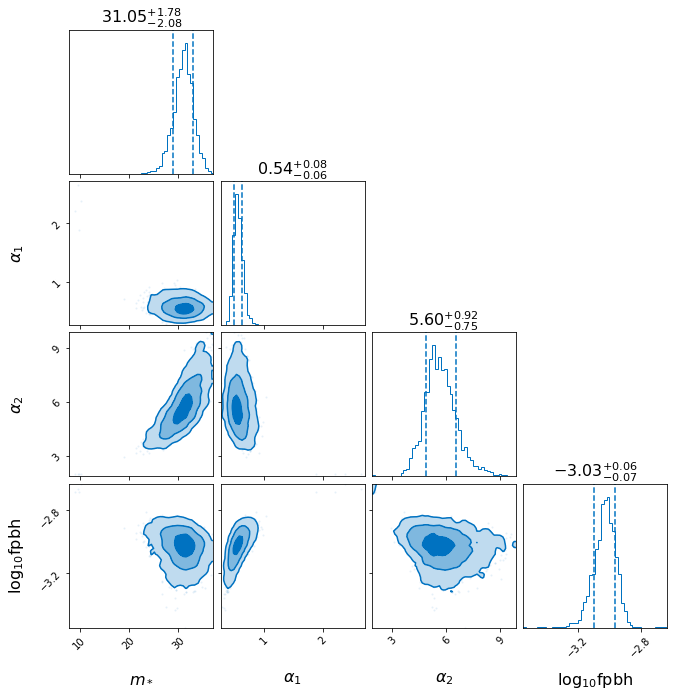

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()


In [24]:
10**(-3.03), 10**(-3.03+0.06) - 10**(-3.03), 10**(-3.03)-10**(-3.03-0.07)

(0.0009332543007969915, 0.00013826500444061556, 0.0001389260660727093)

In [23]:
import numpy as np
np.exp(-1769.591-(-1760.752))

0.0001449676418648956

In [7]:
import numpy as np
np.exp(-1059.681-(-1060.368))

1.987743349398055

In [15]:
import matplotlib.lines as mlines

outdir1 = "./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final/"
outdir2 = "./results/H0_GWTC-3_PBH-bpower-2nd_flatLCDM_final2/"

posteriors1 = np.loadtxt(f"{outdir1}/dynesty_samples.dat", skiprows=1)
posteriors2 = np.loadtxt(f"{outdir2}/dynesty_samples.dat", skiprows=1)

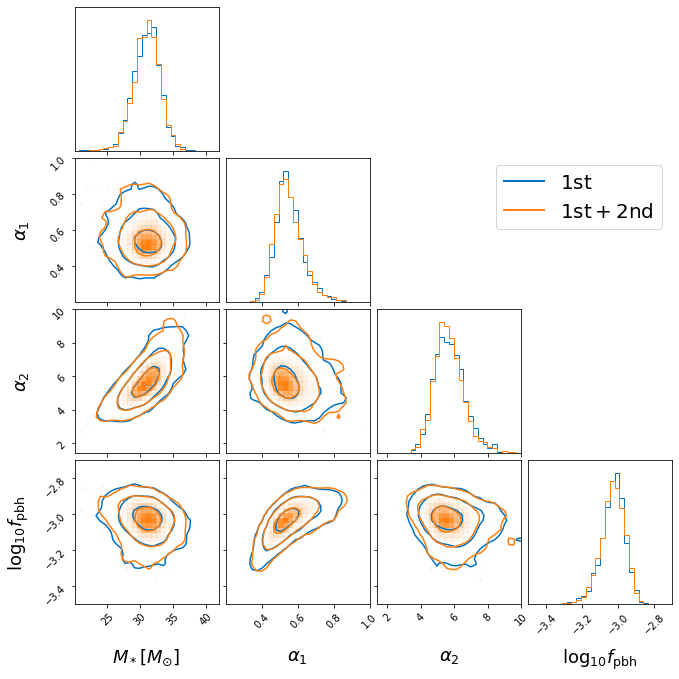

In [25]:
range=((20, 42), (0.2, 1), (1.4, 10), (-3.5, -2.7))

fig = corner.corner(
    posteriors1,
    bins=30,
    smooth=0.9,
    color="#0072C1",
    labels=[
        r"$M_*[M_{\odot}]$",
        r"$\alpha_1$",
        r"$\alpha_2$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=range,
)

corner.corner(
    posteriors2,
    bins=30,
    smooth=0.9,
    color="#FF7F0E",
    labels=[
        r"$M_*[M_{\odot}]$",
        r"$\alpha_1$",
        r"$\alpha_2$",
        r"$\log_{10}f_\mathrm{pbh}$",
    ],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=False,
    show_titles=False,
    title_kwargs={"fontsize": 18},
    label_kwargs=dict(fontsize=18),
    range=range,
    fig=fig,
    weights=np.ones(len(posteriors2)) * len(posteriors1) / len(posteriors2),
)

blue_line = mlines.Line2D([], [], color="#0072C1", lw=2, label=r"$\rm{1st}$")
orange_line = mlines.Line2D([], [], color="#FF7F0E", lw=2, label=r"$\rm{1st+2nd}$")
plt.legend(
    handles=[blue_line, orange_line],
    bbox_to_anchor=(1, 3.12),
    loc="upper right",
    fontsize=20,
)  # prop={'size': 8})
plt.savefig("../latex/post-bpower.pdf")
plt.show()


In [10]:
def get_credibles(posts):
    x_low, x_median, x_up = np.quantile(posts, [0.05, 0.5, 0.95])
    return x_median, (x_up - x_median), (x_median - x_low)

In [11]:
posts = posteriors2[:, 0]
get_credibles(posts)

(31.099647199967592, 2.9754343685010554, 3.5540369228566213)

In [12]:
posts = posteriors2[:, 1]
get_credibles(posts)

(0.5429004773631367, 0.152805620416806, 0.10366830988023584)

In [13]:
posts = posteriors2[:, 2]
get_credibles(posts)

(5.663514120898949, 1.693415213645511, 1.2561153514486225)

In [14]:
posts = posteriors2[:, 3]
get_credibles(posts)

(-3.024598222451917, 0.0938157659126384, 0.12443544562288755)